# 用散点图进行数据分析

### 1. 初始设置

首先，导入所需的库，并设置中文字体和定义颜色等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 禁用科学计数法
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

从 Excel 文件中读取数据，并定义画图用的数据。

In [2]:
# 数据源路径
filepath='./data/客户年龄和消费金额.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath, index_col='客户编号')

# 定义画图用的数据：年龄和人均消费金额
df_group = df.groupby('年龄').mean()
x = np.array(df_group.index).reshape(-1, 1)
y = np.array(df_group.values)

# 用管道的方式调用算法，以便把线性回归扩展为多项式回归
poly_reg = Pipeline([
    ('ploy', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
])

# 拟合
poly_reg.fit(x, y)

# 斜率
coef = poly_reg.steps[1][1].coef_
# 截距
intercept = poly_reg.steps[1][1].intercept_
# 评分
score = poly_reg.score(x, y)

### 3. 开始画图

用「**面向对象**」的方法画图。

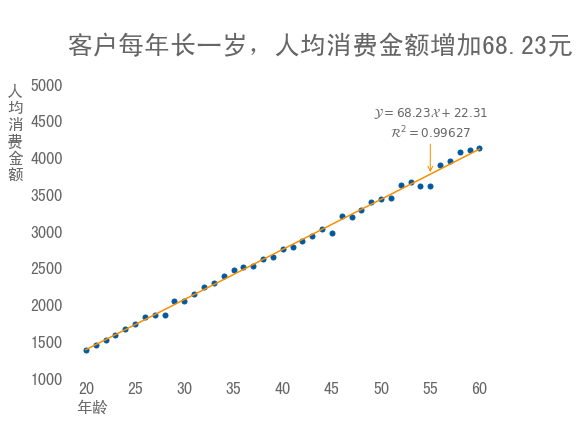

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax = plt.subplots(figsize=(8, 6))

# 设置标题
ax.set_title('\n客户每年长一岁，人均消费金额增加' + '%.2f' % coef[0][1] + '元\n', loc='left', size=26, color=c['深灰色'])

# 画气泡图
ax.scatter(x, y, color=c['蓝色'], marker='.', s=100, zorder=1)

# # 绘制预测线
y2 = poly_reg.predict(x)
ax.plot(x, y2, '-', c=c['橙色'], zorder=2)

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 隐藏刻度线
ax.tick_params(axis='x', which='major', length=0)
ax.tick_params(axis='y', which='major', length=0)

ax.set_ylim(15, 65)
ax.set_ylim(1000, 5000)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=c['深灰色'])
ax.text(ax.get_xlim()[0]-6, ax.get_ylim()[1], '人\n均\n消\n费\n金\n额', va='top', fontsize=16, color=c['深灰色'])

# 设置坐标轴的标题
ax.text(ax.get_xlim()[0]+1, ax.get_ylim()[0]-300, '年龄', ha='left', va='top', fontsize=16, color=c['深灰色'])

# 预测 55 岁的人均消费金额
predict = poly_reg.predict([[55]])

# 标注公式
formula = r'$\mathcal{Y} = ' + '%.2f' % coef[0][1] + '\mathcal{X}' + '%+.2f$' % intercept[0] + '\n' + r'$\mathcal{R}^2 = ' + '%.5f$' % score
ax.annotate(formula, xy=(55, predict), xytext=(55, predict+500), ha='center', fontsize=12, color=c['深灰色'], arrowprops=dict(arrowstyle='->', color=c['橙色']))

plt.show()